# Abstract

I am aiming to find out if Covid-19 lockdown levels increased National Park visitation in these areas.
Using CDC and National Park Visitor Data, I cleaned my data to account for missing data, mis-matched variable names, and formatting issues. I then created new features that aggregated max/min/average CDC stay-at-home orders by state. 
I performed linear regression, random forest regression, and k-nearest-neighbors on my dataset. From these models, I was able to determine the recreational visitors for a given park, year, and lockdown level with varying degrees of accuracy. 
Finally, I was able to conclude that the predictor varables: Covid Lockdown Level, Park Name, and Year are not sufficient to predict the amount of recreation visitors. There is not a strong enough correlation to create an accurate model, especially given the short timeframe of the CDC data. Moving forward, it is recommended to incoporate data that can be more granularly matched to the Park Data.

# Overview and Motivation

The goals of my project are to determine Covid-19 lockdown levels increased National Park visitation in the areas with higher lockdowns levels. I am aiming to create a machine learning model that can accurately predict the visitation in a given park using relevant data. 

I think that this is an interesting question because I can see park usage being reduced due to these lockdowns or alternatively increased as people looked for more outdoor activities. 

# Related Work

I was inspired by a similar study (Alba et al., 2022) uses cellphone data to understand the relationship between national park visits and communities of color during the recent Covid-19 years. They were able to draw interesting conclusions that pinpointed the distance traveled to the national park as a major factor in a decrease in visiting. Finding correlations such as these could help alleviate inequality that has been exaggerated by the Covid-19 pandemic. 

# Inital Questions

A question I would like to approach with this dataset is to find out if Covid-19 lockdown levels increased National Park visitation in the given areas. Do states with higher lockdowns see more people in their parks?

Formulating this as a research question, I can ask: 

*Using the NPS and CDC datasets, can we use a linear regression model to predict the visitation in a park with 70% accuracy knowing the date, the park and the state’s gathering ban status?*

More particularly, I can define my variables to be:

*Predictors: Year, Order_code, Park Name*

*Response: RecreationVisitors*

Given the correlation between Covid-19 and increased in park usage in America as a whole as seen in Google’s Community report,  I anticipate that park visitation will increase in regions with more mandatory gathering bans as people looked for more outdoor activities.

# Data

## Datasets

The dataset I have chosen to use is the National Park Service Annual Summary Report. This dataset includes recreation and non-recreation visitation hours as well as data for different types of overnight stays for each national park. This dataset will serve as my dependent variable and can be found [here](https://irma.nps.gov/STATS/SSRSReports/National%20Reports/Annual%20Summary%20Report%20(1904%20-%20Last%20Calendar%20Year). 

For my independent variable, I will look at data representative of Covid-19 lockdown levels. For this, I will use the [CDC dataset](https://data.cdc.gov/Policy-Surveillance/U-S-State-and-Territorial-Stay-At-Home-Orders-Marc/y2iy-8irm) that provides state and county level covid restriction measures by date. This dataset provides a categorical classification (NA, recommended, or mandatory) on whether a county had implemented a stay-at-home order or gathering ban. 


*Links:*

https://irma.nps.gov/STATS/SSRSReports/National%20Reports/Annual%20Summary%20Report%20(1904%20-%20Last%20Calendar%20Year) 

https://data.cdc.gov/Policy-Surveillance/U-S-State-and-Territorial-Stay-At-Home-Orders-Marc/y2iy-8irm 

In [1]:
import pandas as pd

# Loading in National Park Data
parkdata = pd.read_csv('parkdata.csv')
parkdata.head()

,ParkName,Year,RecreationVisitors,NonRecreationVisitors,RecreationHours,NonRecreationHours,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,...,TotalNonRecreationVisitors,TotalRecreationHours,TotalNonRecreationHours,TotalConcessionerLodging,TotalConcessionerCamping,TotalTentCampers,TotalRVCampers,TotalBackcountry,TotalNonRecreationOvernightStays,TotalMiscellaneousOvernightStays
0,Abraham Lincoln Birthplace NHP,2010,"177,122",0,"177,122",0,0,0,0,0,...,"1,944,765,844","15,556,732,671","1,042,628,874","36,379,001","15,628,328","39,333,841","26,702,724","22,415,772","1,372,431","22,376,784"
1,Abraham Lincoln Birthplace NHP,2011,"163,568",0,"163,568",0,0,0,0,0,...,"1,944,765,844","15,556,732,671","1,042,628,874","36,379,001","15,628,328","39,333,841","26,702,724","22,415,772","1,372,431","22,376,784"
2,Abraham Lincoln Birthplace NHP,2012,"169,515",0,"169,515",0,0,0,0,0,...,"1,944,765,844","15,556,732,671","1,042,628,874","36,379,001","15,628,328","39,333,841","26,702,724","22,415,772","1,372,431","22,376,784"
3,Abraham Lincoln Birthplace NHP,2013,"163,928",0,"163,928",0,0,0,0,0,...,"1,944,765,844","15,556,732,671","1,042,628,874","36,379,001","15,628,328","39,333,841","26,702,724","22,415,772","1,372,431","22,376,784"
4,Abraham Lincoln Birthplace NHP,2014,"241,264",0,"241,264",0,0,0,0,0,...,"1,944,765,844","15,556,732,671","1,042,628,874","36,379,001","15,628,328","39,333,841","26,702,724","22,415,772","1,372,431","22,376,784"


In [2]:
# Loading in CDC Data
cdcdata = pd.read_csv('CDC.csv')
cdcdata.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,Order_code,Stay_at_Home_Order_Recommendation,Express_Preemption,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,3/15/2020,7,NaN,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,3/16/2020,7,NaN,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,3/17/2020,7,NaN,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,3/18/2020,7,NaN,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,3/19/2020,7,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

Looking at the NPS data, I see that the Total Visitor statistics have been added as their own columns. I do not plan on using that data, so to make the df more managable, I will remove those columns. 

I have also decided to focus on predicting the total recreation visitors, so I just kept that column.

In [3]:
#totalParkCols = ["TotalRecreationVisitors","TotalNonRecreationVisitors","TotalRecreationHours","TotalNonRecreationHours","TotalConcessionerLodging","TotalConcessionerCamping","TotalTentCampers","TotalRVCampers","TotalBackcountry","TotalNonRecreationOvernightStays","TotalMiscellaneousOvernightStays"]
#parkdata.drop(columns=totalParkCols, inplace=True)

# Just keep first thre cols
parkdata = parkdata[['ParkName', 'Year', "RecreationVisitors"]]

Next I looked at the data types of each column. Unfortunately, it seems most columns are object types which will need to be converted to numbers.


In [4]:
parkdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4493 entries, 0 to 4492
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ParkName            4493 non-null   object
 1   Year                4493 non-null   int64 
 2   RecreationVisitors  4493 non-null   object
dtypes: int64(1), object(2)
memory usage: 105.4+ KB


I made a simple function to convert an Object type into a number. For now, I will just convert Recreation Visitors, which is my primary metric.

In [5]:
# toNum converts a column with a numerical object to a float, getting rid of any commas
def toNum(df, colname):
  # Convert Object to string
  df[colname] = df[colname].astype(str)
  # Remove any commas
  df[colname] = df[colname].str.replace(',', '')
  # Convert to float, with any errors (the nan columns, now strings) converted to NaN
  df[colname] = pd.to_numeric(df[colname], errors='coerce')
  return 

toNum(parkdata, 'RecreationVisitors')

Next, I looked at the CDC data. This data is more complex, but I will primarily be looking at the State, date, and stay-at-home data. 

In [7]:
cdcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677927 entries, 0 to 1677926
Data columns (total 11 columns):
 #   Column                             Non-Null Count    Dtype 
---  ------                             --------------    ----- 
 0   State_Tribe_Territory              1677927 non-null  object
 1   County_Name                        1677927 non-null  object
 2   FIPS_State                         1677927 non-null  int64 
 3   FIPS_County                        1677927 non-null  int64 
 4   date                               1677927 non-null  object
 5   Order_code                         1677927 non-null  int64 
 6   Stay_at_Home_Order_Recommendation  1461933 non-null  object
 7   Express_Preemption                 1448788 non-null  object
 8   Source_of_Action                   1461223 non-null  object
 9   URL                                721717 non-null   object
 10  Citation                           1461933 non-null  object
dtypes: int64(3), object(8)
memory usage: 

One thing I see immediately that I would like to correct is converting the date to the datetime data type 

In [8]:
cdcdata['date'] = pd.to_datetime(cdcdata['date'])

The core of my usage of this data will come from the Stay_at_home_Order_Recommendation column, which contains the "Lockdown status." I see this is an object type with the following values:

In [9]:
cdcdata["Stay_at_Home_Order_Recommendation"].value_counts()

Advisory/Recommendation                                                        643866
No order for individuals to stay home                                          623940
Mandatory for all individuals                                                   95982
Mandatory only for at-risk individuals in the jurisdiction                      93030
Mandatory only for all individuals in certain areas of the jurisdiction          5085
Mandatory only for at-risk individuals in certain areas of the jurisdiction        30
Name: Stay_at_Home_Order_Recommendation, dtype: int64

These values would be more useful in enumerated. I checked Order_code column which seemed to have some relationship to these lockdown levels

In [10]:
cdcdata["Order_code"].value_counts()

7    839934
6    643866
1     95982
3     93030
2      5085
5        30
Name: Order_code, dtype: int64

Looking at the value counts we can see the following order codes are equivalent to the following recommendations:

1) Mandatory for all individuals

2) Mandatory only for all individuals in certain areas of the jurisdiction

3) Mandatory only for at-risk individuals in the jurisdiction  

5) Mandatory only for at-risk individuals in certain areas of the jurisdiction        

6) Advisory/Recommendation

7) No order for individuals to stay home

There are more counts for order code (7) than the corresponding recommendation which can be attributed to the fact that a (7) can also correspond to a NA in the recommendation column


Looking at both datasets together, one glaring issue is that my national park data is not labelled by state, while the CDC data is. Luckily, the NPS has another dataset which includes park states. I can use this to append a state column to *parkdata*

This dataset can be found here:

In [11]:
# Loading in National Park Data
parkstates = pd.read_csv('parkstates.csv')
parkstates.head()

,State,Field1,Field2,Textbox22,Field4,Textbox24,TotalNonRecreationVisits,Textbox98,TotalRecreationVisitorHours,Textbox103,...,Textbox47,Textbox129,Textbox42,Textbox135,Textbox37,Textbox141,Textbox95,Textbox146,Textbox90,Textbox153
0,Alabama,Horseshoe Bend NMP,"58,285",103.79%,"14,522",65.25%,0,NaN,"174,275",65.25%,...,"3,185,050",NaN,"2,473,338",NaN,"1,953,623",NaN,"37,731",NaN,"1,370,208",NaN
1,Alabama,Little River Canyon NPRES,"862,606",7.51%,"184,841",9.49%,0,NaN,"2,218,097",9.49%,...,"3,185,050",NaN,"2,473,338",NaN,"1,953,623",NaN,"37,731",NaN,"1,370,208",NaN
2,Alabama,Natchez Trace PKWY,"448,094",4.52%,"150,445",4.90%,"612,525",5.06%,"1,805,344",4.90%,...,"3,185,050",NaN,"2,473,338",NaN,"1,953,623",NaN,"37,731",NaN,"1,370,208",NaN
3,Alabama,Russell Cave NM,"22,393",164.63%,"1,930",79.70%,0,NaN,"23,170",79.70%,...,"3,185,050",NaN,"2,473,338",NaN,"1,953,623",NaN,"37,731",NaN,"1,370,208",NaN
4,Alabama,Tuskegee Airmen NHS,"8,057",17.74%,"1,007",17.78%,0,NaN,"12,084",17.73%,...,"3,185,050",NaN,"2,473,338",NaN,"1,953,623",NaN,"37,731",NaN,"1,370,208",NaN


I will use this to add a state column to parkdata. Note that some parks are in more than one state, in which case they will only be assigned to one state for now.

In [12]:
# Create a dict to map park names to their corresponding state
stateMap = dict(zip(parkstates.Field1, parkstates.State))

# Create a new column in Parkdata with the State
parkdata["State"] = parkdata["ParkName"].map(stateMap)

I will also need to enumerate the park names in order to run my model, so now is a good time to do that. I will do this by creating a "park_id" column.

In [14]:
parkdata.sort_values('RecreationVisitors')
parkdata.head()

,ParkName,Year,RecreationVisitors,State
0,Abraham Lincoln Birthplace NHP,2010,177122,Kentucky
1,Abraham Lincoln Birthplace NHP,2011,163568,Kentucky
2,Abraham Lincoln Birthplace NHP,2012,169515,Kentucky
3,Abraham Lincoln Birthplace NHP,2013,163928,Kentucky
4,Abraham Lincoln Birthplace NHP,2014,241264,Kentucky


In [15]:
# Create a dict to map park names to their corresponding id
idMap = dict(zip(parkstates.Field1, parkstates.index))

# Create a new column in Parkdata with the State
parkdata["park_id"] = parkdata["ParkName"].map(idMap)

# Exploratory Data Analysis

I have cleaned my data to account for missing data, mis-matched variable names, and formatting issues. I created a dataframe to merge together selected CDC and Park data in order to perform more complex analysis and visualizations. 

During my EDA, I found was that there was a dip in overall park visitation around 2013 time period (see first graphic in visualization section). While I was predicitng to see a dip or spike around 2020 due to Covid-19, I assumed that visitation would be pretty linear prior to that. 

From the CDC lockdown levels (organized by day and county), I had to create a new feature that would align with the park data (organized by year and state). I began to explore several different options for this feature, which would be used as one of my predictor variables. This included finding the minimum and maximum lockdown levels, as well as the most common level over the year time period.

## Data Visualization


First, I wanted to understand how many unique parks there were. When I used value_counts I was able to see that there was 388 parks, but not all of them had the same amount of counts, which must mean that they were either added after 2010 or removed before 2021.

In [16]:
parkdata["ParkName"].value_counts()

Abraham Lincoln Birthplace NHP     12
Mount Rushmore NMEM                12
New Bedford Whaling NHP            12
Navajo NM                          12
Natural Bridges NM                 12
                                   ..
Medgar and Myrlie Evers Home NM     1
World War I Memorial                1
Tule Springs Fossil Beds NM         1
Camp Nelson NM                      1
Alagnak Wild River                  1
Name: ParkName, Length: 388, dtype: int64

I decided I could try to plot the number of parks with data for each year to understand if the number of parks was generally increasing, decreasing, or staying the same. I found that there seemed to be more parks being added over the years. For the next steps of my project, I will probably remove parks that were added during Covid-19, or right before, as they would not have historic data to compare agains.

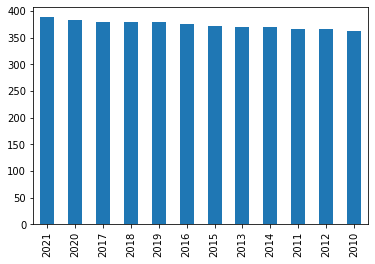

In [17]:
parkdata["Year"].value_counts().plot(kind='bar')

Since there are so many parks, I won't be able to plot a histogram of visitors over the years for each of them. I will start by looking at the total visitors for each year.

<BarContainer object of 12 artists>

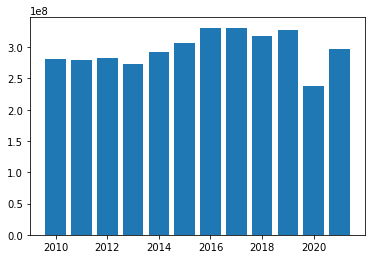

In [18]:
%matplotlib inline 
import matplotlib.pyplot as plt

years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

yearlyVisitors = []
for year in years:
    yearlyVisitors.append(parkdata.loc[(parkdata['Year'] == year), 'RecreationVisitors'].sum())
    
plt.bar(years, yearlyVisitors)

Another way to visualize the data is to plot the park visitors by year for each state. If I use a line chart, I might be able to understand if the trends are different for each state (some lines increasing, others decreasing) or if all lines follow the same trend. 

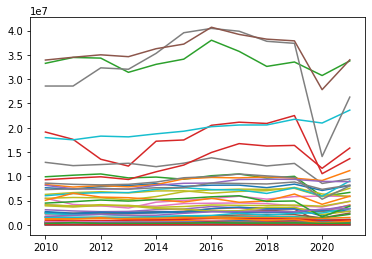

In [19]:
import numpy as np

states = parkdata['State'].unique()
stateVisits = pd.DataFrame()
stateVisits.head()

stateByYear = []
for year in years:
  for state in states:
    stateByYear.append(parkdata.loc[(parkdata['Year'] == year)&(parkdata['State'] == state), 'RecreationVisitors'].sum())
  stateVisits[year] = stateByYear
  stateByYear = []

stateVisits = stateVisits.set_index(states)
stateVisits = stateVisits.T

stateVisits.plot(legend=False)


For the CDC data, I similarly want to visualize the trends over time. To get a general overview, I will look at the category levels overall over time. Honestly, I struggled to get this plot to represent what I was hoping for, which would have the order levels as different color lines, time as the x axis, and the value counts as the y axis. 

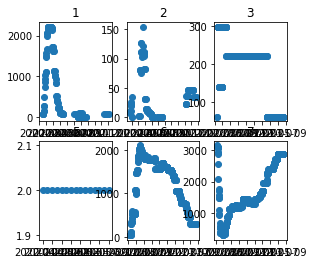

In [20]:
import matplotlib.pyplot as plt
import pandas as pd 

dates = cdcdata['date'].unique()
levels = [1, 2, 3, 5, 6, 7]

cdcLevels = cdcdata.groupby('Order_code')['date'].value_counts().to_frame(name = 'count').reset_index()

for level in levels:
  plt.subplot(2, 4, level)
  df1 = cdcLevels.loc[(cdcLevels['Order_code'] == level)]
  plt.scatter(df1['date'], df1['count'])
  plt.title(level)


Like the park data, I can break down the CDC category levels by state and see how those trends compare.

## Data Joining

In order to perform more complex analysis, I need to join the CDC and park data. Since the park data is organized by year, my plan is to look at creating new features for the CDC data in a few different ways. This includes generalizing the data by both state and year. I tried taking min and mode of the data.

1) Choose the most common (mode) lockdown levels for all counties in a certain state over the year in question

2) Choose the minimum lockdown level for all counties in a certain state over the year in question. 

Another option if I have time:
3) Average the lockdown level for the county in question over the year in question. This feature would require adding a county marker to each park, but would allow me to refine the results by a lot.

In [21]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

In [22]:
cdcdata['year'] = pd.DatetimeIndex(cdcdata['date']).year
features = pd.DataFrame()
features['Common'] = cdcdata.groupby(['State_Tribe_Territory','year'])['Order_code'].agg(pd.Series.mode)
features['Min'] = cdcdata.groupby(['State_Tribe_Territory','year'])['Order_code'].min()
county = cdcdata.groupby(['State_Tribe_Territory','County_Name','year'])['Order_code'].agg(pd.Series.mode)
features = features.reset_index() 
features['State_Tribe_Territory'] = features['State_Tribe_Territory'].map(states)
features.head()

,State_Tribe_Territory,year,Common,Min
0,Alaska,2020,7,1
1,Alaska,2021,7,7
2,Alabama,2020,6,1
3,Alabama,2021,7,6
4,Arkansas,2020,7,7


The final step is to join these new features with the park data. My desired format for my data when complete is:

Park, Year, Visitor Data, State, Average Lockdown, Maximum Lockdown

I will fill in 8 for years that do not have order codes, since higher numbers mean less severe restrictions.

In [23]:
joined = pd.merge(parkdata, features, left_on=["State",'Year'], right_on=['State_Tribe_Territory','year'], how='outer')
joined.drop(columns=['State_Tribe_Territory', 'year'], inplace=True)
joined=joined.drop(joined.index[-4:])
joined.fillna(8, inplace=True)

joined.head()

,ParkName,Year,RecreationVisitors,State,park_id,Common,Min
0,Abraham Lincoln Birthplace NHP,2010.0,177122.0,Kentucky,156.0,8.0,8.0
1,Mammoth Cave NP,2010.0,497225.0,Kentucky,160.0,8.0,8.0
2,Abraham Lincoln Birthplace NHP,2011.0,163568.0,Kentucky,156.0,8.0,8.0
3,Mammoth Cave NP,2011.0,483319.0,Kentucky,160.0,8.0,8.0
4,Abraham Lincoln Birthplace NHP,2012.0,169515.0,Kentucky,156.0,8.0,8.0


I will now gather some information about my joined dataset to make sure everything is in good shape before plugging the data into the model.

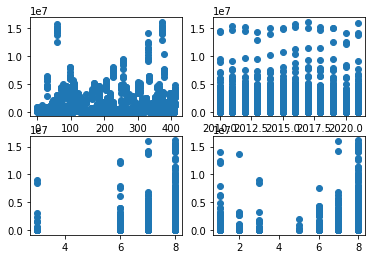

In [24]:
fig, axs = plt.subplots(2, 2)

axs[0,0].scatter(joined['park_id'], joined['RecreationVisitors'])
axs[0,1].scatter(joined['Year'], joined['RecreationVisitors'])
axs[1,0].scatter(joined['Common'], joined['RecreationVisitors'])
axs[1,1].scatter(joined['Min'], joined['RecreationVisitors'])

At this point, it is clear that there is not much of a linear relationship between the factors I had hoped to incorporate into my final model.

I can use a correlation matrix to see if there are measureable any non-linear correlations between these factors that I might have missed in the scatter plots

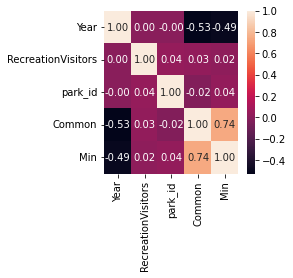

In [25]:
import seaborn as sns
from pylab import rcParams

def plot_correlation(data):
    rcParams['figure.figsize'] = 3, 3
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')

# plot correlation & densities
plot_correlation(joined)

From this plot, I can conclude that the Mimimum and most Common order codes are strongly correlated with each other, which makes logical sense. These two are also correlated with the year, which follows given that order codes only became relevant in years 2020 and onwards. Unfortunately, none of these variables correlate very strongly with the recreation visitors. 

# Model Revision

In the end, I narrowed down the scope of my project to just four indpendent variables: Park Name, Year, Minimum Order Code, and Most Common order code. This included creating two features from the original CDC data. I also narrowed down my ouput to single dependent variable: Recreation Visitors. 

From this point, I was able to move forward and start evaluating different machine learning models.

## Linear Regression

 The first approach I plan on taking is to use linear regression to predict the number of visitors in a given year. I plan on using a 30/70 test/train split, and using MSE as my primary metric for evaluating performance. 

In [26]:
# Import linear regression and the diabetes dataset
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = joined[['Min', 'Year', 'park_id']]
y = joined['RecreationVisitors']

# Split the targets into training/testing sets
joined_X_train, joined_X_test, joined_y_train, joined_y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(joined_X_train, joined_y_train)

# Predict the values of unseen items
predicted_targets = regr.predict(joined_X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(joined_y_test, predicted_targets))
print('R2 score:', r2_score(joined_y_test, predicted_targets)) 
print('mean absolute error: ', mean_absolute_error(joined_y_test, predicted_targets))

mean_squared_error :  2671626834070.2773
R2 score: 0.0027588254509992582
mean absolute error:  923262.3299300801


Now I will try with both the "common" feature as well as "min".

In [28]:
X = joined[['Min', 'Common', 'Year', 'park_id']]
y = joined['RecreationVisitors']

# Split the targets into training/testing sets
joined_X_train, joined_X_test, joined_y_train, joined_y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(joined_X_train, joined_y_train)

# Predict the values of unseen items
predicted_targets = regr.predict(joined_X_test)

# model evaluation
print('mean_squared_error: ', mean_squared_error(joined_y_test, predicted_targets))
print('R2 score:', r2_score(joined_y_test, predicted_targets)) 
print('mean absolute error: ', mean_absolute_error(joined_y_test, predicted_targets))

mean_squared_error:  2676166085200.7617
R2 score: 0.0010644540398390134
mean absolute error:  922053.7744319125


My MSE error is very large. This can be due to a combonation of the facts that my data does not look very linear, as well as the fact that I am dealing with large numbers of visitors. Since MSE is just the mean error squared, a difference of a few thousand visitors can quickly make this number inflate.

However, I can mostly attribute this large error to the fact that there is probably not a large linear correlation to be found.

Plotting each of the predicted linear regression outputs confirms the non-linearity of this data.

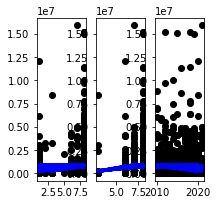

In [29]:
# Plot outputs
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.scatter(joined_X_test.iloc[:, 0], joined_y_test, color="black")
ax1.plot(joined_X_test.iloc[:, 0], predicted_targets, color="blue", linewidth=3)

ax2.scatter(joined_X_test.iloc[:, 1], joined_y_test, color="black")
ax2.plot(joined_X_test.iloc[:, 1], predicted_targets, color="blue", linewidth=3)

ax3.scatter(joined_X_test.iloc[:, 2], joined_y_test, color="black")
ax3.plot(joined_X_test.iloc[:, 2], predicted_targets, color="blue", linewidth=3)

Next, I will look into other supervised learning models.

## Random Forest

Another regression approach is random forest regression, which is more suitable for accounting for non-linearity in a regression task. 

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Get data
X = joined[['Min', 'Common', 'Year', 'park_id']]
y = joined['RecreationVisitors']

# Split the targets into training/testing sets
joined_X_train, joined_X_test, joined_y_train, joined_y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Create Random Forest
forest_regr = RandomForestRegressor()

# Train the model using the training sets
forest_regr.fit(joined_X_train, joined_y_train)

# Predict the values of unseen items
predicted_targets = forest_regr.predict(joined_X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(joined_y_test, predicted_targets))
print('R2 score:', r2_score(joined_y_test, predicted_targets)) 
print('mean absolute error: ', mean_absolute_error(joined_y_test, predicted_targets))

mean_squared_error :  58130658550.91647
R2 score: 0.9783015032371478
mean absolute error:  103681.08018545994


This model has a slightly lower MSE, a much higher R2, and a similar MAE to the linear regression model. From this, I can conclude that while fitting the data differently, it has a similarly poor performance.

## K-Nearest-Neighbors

For my final attempt I will use a k-nearest-neighbors model. This model is primarily used for clustering, but I think it would be worth exploring since each park has it's own range of recreational visitors. For example, a large park like Yellowstone would see wildly different amount of visitors than a small state park. In this case, a knn model might be able to account for this behavior. 

In [31]:
from sklearn.neighbors import KNeighborsClassifier

X = joined[['Min', 'Year', 'park_id']]
y = joined['RecreationVisitors']

# Split the targets into training/testing sets
joined_X_train, joined_X_test, joined_y_train, joined_y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Fit the model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(joined_X_train, joined_y_train)

KNeighborsClassifier()

In [32]:
knn.score(joined_X_test, joined_y_test)

0.002967359050445104

This result seems to be just as inaccurate as the linear regression model. 

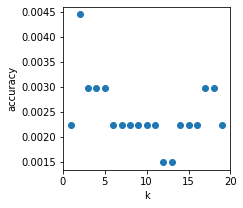

In [33]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(joined_X_train, joined_y_train)
    scores.append(knn.score(joined_X_test, joined_y_test))

plt.figure(figsize=(3, 3))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

For my data, it seems the model might perform better with 2-4 neighbors instead. However, I will keep this at 5 to avoid overfitting my data. 

# Final Analysis

Final Analysis section should make an argument for your final findings and present them in a cohesive, coherent manner (basically, this is your full presentation of the insights you gained from your machine learning/data science analysis). So the main difference from Milestone 4 will be a full discussion and presentation of your final findings and results from your analyses and revision so far.

My inital question was: *Using the NPS and CDC datasets, can we use a linear regression model to predict the visitation in a park with 70% accuracy knowing the **date**, the **park** and the state’s **gathering ban status**?*

From exploring my data and creating models, I was able to  learn that my Recreational Visitors to national parks have a non linear correlation with each of my predictor variables, although I was able to come up with some interesting visualizations for both the CDC and National Park datasets sepearately. 

During my Data Visualization, I was able to disprove part of my inital hypothesis, which was that Covid-19 would *increase* Recreational Visitors. I was unsure if it would be an increase or a decrease. Here, the sharp decrease in visitors during 2020 is easily visualized. However, the reasoning behind this can differ. Some parks shut down due to Covid and did not permit any visitors. Other parks remained open but unstaffed, which led to a drop in recorded visitors, but an unknown amount of actual. That is outside the scope of this project, but it would be interesting to incorporate mobility data (like in the related work talked about previously) to see if "Recreation Visitors" reflects the true visitor data.
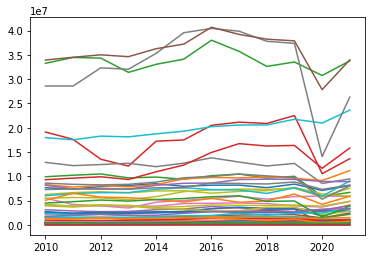

While cleaning my data, I reduced it down to four central features. These were:


1.   Park ID
2.   Year
3.   Minimum Covid-19 order code by state
4.   Most Common Covid-19 order code by state

After performing my data analysis, I tried three different machine learning models and was able to evaluate them with several different metrics. 

First, I tried a linear regression model. From my EDA, I did not expect my data to be particularly linear, but thought it would be a good place to start given this was a supervised regression task. 

After that, I revised my approach to a random forest model. I thought that this model might account for more non-linearity in the data, but the performance did not seem to improve much.

Finally, I tried a K-nearest-neighbors model. Even though KNN is typically used for clustering tasks, I thought that it might lend an advantage given the wide range of visitors between popular and unknown parks. However, this model also did not improve the results greatly. 

The scores for each are listed below. 


Model | Metric | Score (rounded)
--- | --- | ---
Linear Regression | MSE | 2.67e12
Linear Regression | R2| 0.00106
Linear Regression | MAE| 922053.77
Random Forest | MSE| 6.32e11
Random Forest | R2| 0.976
Random Forest | MAE| 105172.92
K-nearest-neighbors | score | 0.00297


It is clear that none of these models are accurate so far as being able to predict the recreational visitors. I can therefore conclude that these are not strong predictor variables, and it is **not** possible to predict visitation knowing just park, date, and status. 

I believe there are several possible reasons that these models might not be accurate. First, is that the features that I have chosen might not be robust enough. Using Principal Component Analysis or Factor Analysis could find latent factors that would improve their accuracy. Another reason is that there is a correlation exists, but I was not able to model it correctly. In this case, exploring other models could lead to more accurate results. Finally, expanding my scope to include data that spans more than just 2 years (as the CDC data does) would improve my chances at finding a strong correlation with National Park Visitor data. Models such as random forest perform more accurately when there is more relevant data, so having the opportunity to try more combonations of features is also a possible way to improve accuracy. 

Overall, my project findings imply that there is a complex relationship between visitors at national parks and the Covid-19 lockdown levels in those associated areas.While my EDA showed an undeiable impact of Covid-19 on Park Visitors, truly understanding this relationship truly will one of two options. First, using PCA, I can find any latent factors present in my data. Second, this problem might require more data: either longer Covid-19 data, which might be possible in the coming years, or more nuanced Park location data. 